# Exercise 4.2 | Model Residuals

Diagnosing the fit of the model.

In [22]:
# Imports
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-4-1/data/'

## Exploratory Data Analysis

In [23]:
# Load
data = pd.read_csv(file_path + 'Life_Evaluation_GDP_PerCap.csv')
# Log Transformation
data['log_GDP_PerCap'] = np.log10(data['GDP_Per_Cap'])
# Filter: 2024
data = data[data['Year'] == 2024]
# Show
data.head()

,Year,Country,Life_Evaluation,GDP_Per_Cap,log_GDP_PerCap
0,2024,Afghanistan,1.364,549.27,2.739786
13,2024,Albania,5.411,5411.94,3.733353
26,2024,Algeria,5.571,4361.21,3.639607
45,2024,Argentina,6.397,11107.35,4.045610
58,2024,Armenia,5.494,5016.99,3.700443


<Axes: xlabel='GDP_Per_Cap', ylabel='Life_Evaluation'>

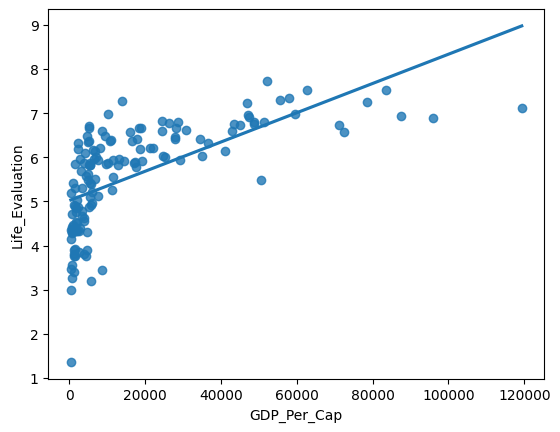

In [26]:
# Visualize: Numerical x Numerical
sns.regplot(y='Life_Evaluation', x='GDP_Per_Cap', data=data, ci=None)

## General Linear Model

In [27]:
# Model: y = b + mx
model = smf.ols('Life_Evaluation ~ GDP_Per_Cap', data).fit() # Intercept is included by default
print(model.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0195      0.093     53.869      0.000       4.835       5.204
GDP_Per_Cap  3.317e-05   3.33e-06      9.969      0.000    2.66e-05    3.98e-05


## Residuals

<Axes: ylabel='Count'>

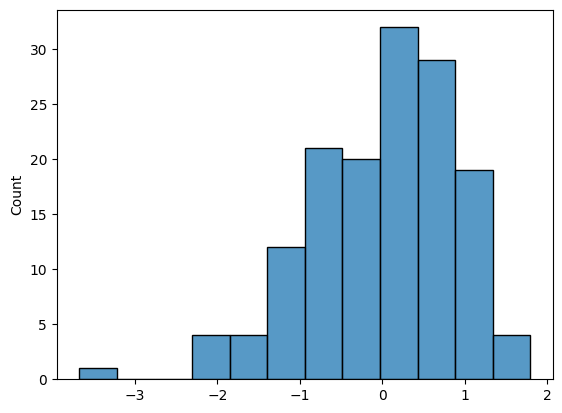

In [28]:
residuals = model.resid
sns.histplot(residuals)

<Axes: ylabel='Count'>

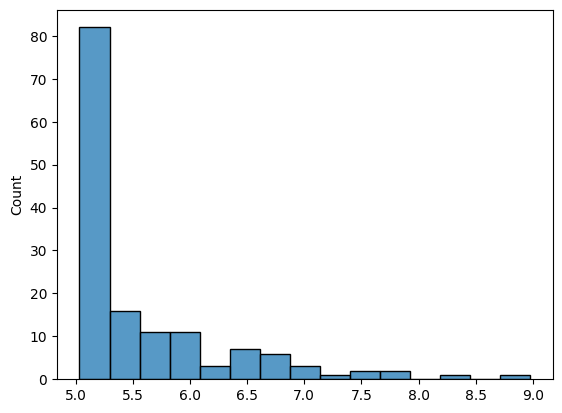

In [29]:
predictions = model.predict()
sns.histplot(predictions)

## Residual Plot

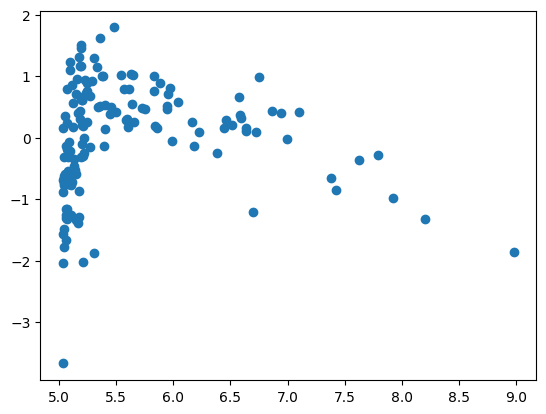

In [30]:
plt.scatter(predictions, residuals)